In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to the file
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning projects/Disease Prediction/Training.csv'
# Loading the file using pandas
df = pd.read_csv(file_path).dropna(axis=1)


In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
disease_counts = df["prognosis"].value_counts()
disease_counts

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


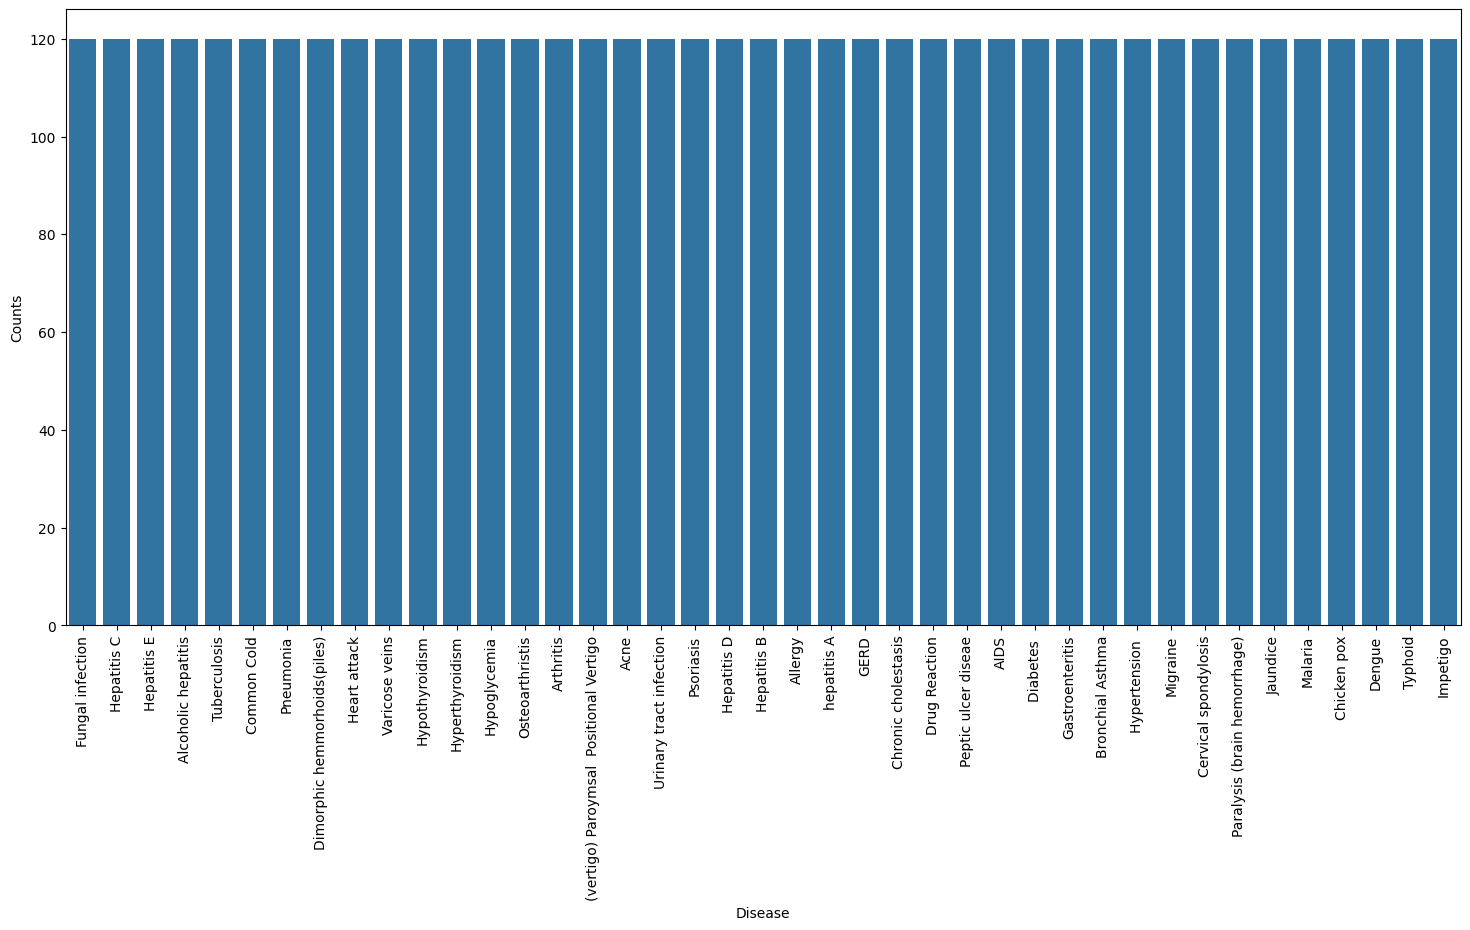

In [ ]:
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [ ]:
x = df.drop(columns=["prognosis"])
y = df["prognosis"]

In [ ]:
y.head()

,prognosis
0,15
1,15
2,15
3,15
4,15


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
def cv_scoring(estimator,x,y):
  return accuracy_score(y,estimator.predict(x))

models = {
    "SVC":SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest" : RandomForestClassifier(random_state=42)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, x, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


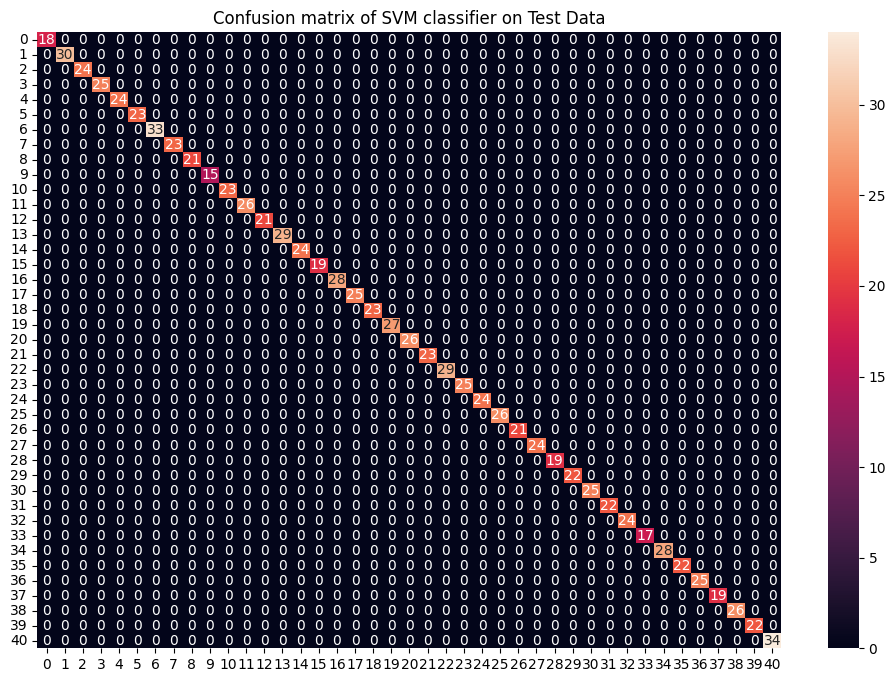

In [ ]:
svm_model  = SVC()
svm_model.fit(x_train,y_train)
preds = svm_model.predict(x_test)
print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, svm_model.predict(x_train))*100}")
print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, svm_model.predict(x_test))*100}")
cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix of SVM classifier on Test Data")
plt.show()

Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


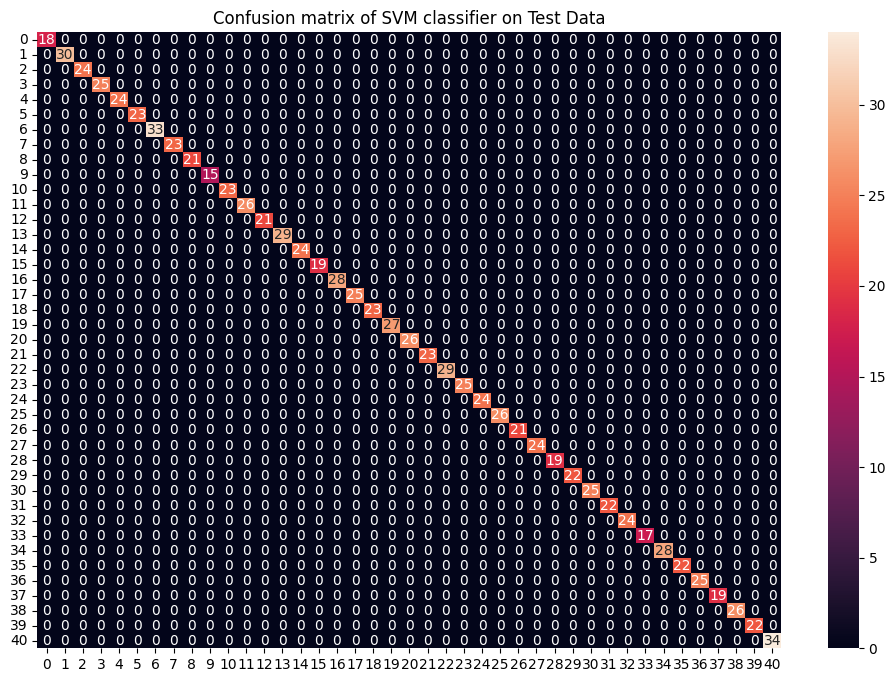

In [ ]:
nb_model  = GaussianNB()
nb_model.fit(x_train,y_train)
preds = nb_model.predict(x_test)
print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, nb_model.predict(x_train))*100}")
print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, nb_model.predict(x_test))*100}")
cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix of SVM classifier on Test Data")
plt.show()

Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


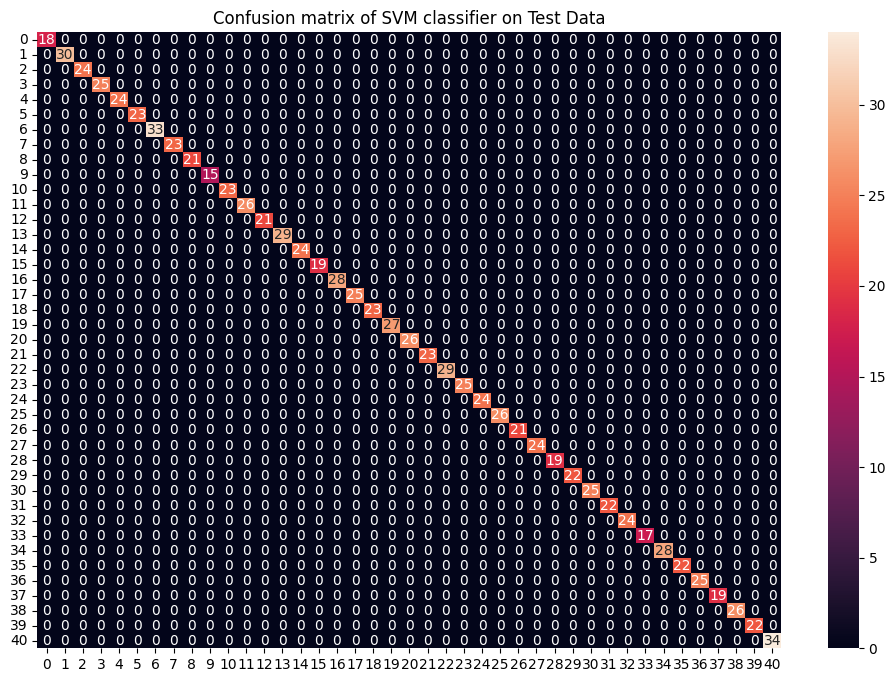

In [ ]:
rf_model  = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
preds = rf_model.predict(x_test)
print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, rf_model.predict(x_train))*100}")
print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, rf_model.predict(x_test))*100}")
cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix of SVM classifier on Test Data")
plt.show()